In [ ]:
from commun import utils
import pandas as pd

json_data = utils.read_json_file(r'W:\Stock-market-analysis\stock_market_analysis\database\tickers\jnj.json')

data = json_data['historical_dividend']

df = pd.DataFrame(data['historical'])

df

In [ ]:
from datetime import date

today = date.today()

year = today.year

s = " 2022."

s.find(str(year))


In [ ]:
import pandas as pd

data: dict = {"2022":{"dividend":0.1}, "2021":{"dividend":0.2}, "2020":{"dividend":0.13}, "2019":{"dividend":0.14}, "2018": {"dividend":0.26},"2017": {"dividend":0.25}}


df = pd.DataFrame(data)

df = df.transpose()

df.reset_index()

df = df[::-1]

#print(df['dividend'][3])

index = len(df.index)

print(index)

for i in range(0, index-1):
    a1 = df['dividend'][i]
    a2 = df['dividend'][i+1]
    
    print(a2/a1)
    
    


In [ ]:
from datetime import date
custom_date = "2020-02-25"

dt = (custom_date[0:4])

dt

In [ ]:
from dictionary import Dictionary


dictionary: Dictionary = Dictionary()

dictionary['pomme'] = 5
dictionary['orange'] = 6
dictionary['vert'] = 8

p = {
    'j': 575,
    'f': 6,
    'g': 15,
    'b': 25
}

f = dictionary.first_value(p)
l = dictionary.last_value(p)
f
#l


In [122]:

from society.stock_company import Enterprise
from commun import utils
import pandas as pd
enterperise: Enterprise = Enterprise()

json_data = r'W:\Stock-market-analysis\stock_market_analysis\database\tickers\tgt.json'

enterperise.load(json_data)

historical_net_profit = enterperise.financial_statement.income_statement.historical_net_profit # net profit table
net_profit_growth = enterperise.financial_statement.income_statement.get_net_profit_growth()
gross_margin_TTM= enterperise.financial_ratio.gross_margin_TTM # la marge brut
net_margin_TTM = enterperise.financial_ratio.net_margin_TTM # la marge net
historical_gross_profit = enterperise.financial_statement.income_statement.historical_gross_profit
sea = enterperise.financial_statement.income_statement.historical_selling_general_and_admin_expense
sae_per_gross_profit = enterperise.financial_statement.income_statement.sae_per_gross_profit
rnd_per_gross_profit = enterperise.financial_statement.income_statement.rnd_per_gross_profit
interet_expense_operating_income = enterperise.financial_statement.income_statement.interest_expense_per_operating_income


print(
    'Croissance de benefice net: {}\n'.format(net_profit_growth),
    'marge net: {}\n'.format(net_margin_TTM),
    'marge brut: {}\n'.format(gross_margin_TTM),
    'vda/revenu brut: {}\n'.format(sae_per_gross_profit),
    'r&d/revenu brut: {}\n'.format(rnd_per_gross_profit),
    'charge interet/revenu d exploitation: {}\n'.format(interet_expense_operating_income)
    
)
df = pd.DataFrame(historical_gross_profit)

df = df.transpose()

df[::-1].plot(subplots=True)


FileNotFoundError: [Errno 2] No such file or directory: 'W:\\Stock-market-analysis\\stock_market_analysis\\database\\tickers\\tgt.json'

In [21]:
import requests

ws_entry_point = 'https://api.statcan.gc.ca/census-recensement/profile/sdmx/rest'
resource = 'dataflow'
agency_id = 'STC_CP'
resource_id = 'DF_PR'
version = '?references=all'
uri = '{}/{}/{}/{}{}'.format(ws_entry_point, resource, agency_id, resource_id, version)
url_2 = 'https://sdw-wsrest.ecb.europa.eu/service/datastructure/ECB/ECB_EXR1/1.0?references=children'

param = {
    
}

header = {'Content-Type':'application/json',
          'Accept': 'application/vnd.sdmx.structure+json;version=1.0'
          }
response = requests.get(uri, headers=header)




In [28]:
import requests

ws_entry_point = 'https://www150.statcan.gc.ca/t1/wds/sdmx/statcan/v1/rest'
resource = 'data'
flowref = 'DF_36100434'
version = '10.2.2.0'
uri = '{}/{}/{}/{}'.format(ws_entry_point, resource, flowref, version)

param = {
    
}

header_2 = {'Content-Type':'application/json',
            'Accept':'application/vnd.sdmx.data+json;version=1.0.0-wd'
          }
response = requests.get(uri, headers=header_2)

In [29]:


response.status_code
response.headers['Content-Type']
response.text
#response.json()


'{"header":{"id":"bfff1fc4-84d1-4daa-9b87-ddfd14dac378","prepared":"2022-12-29T06:35:11","test":false,"sender":{"id":"unknown","name":"unknown"}},"dataSets":[{"action":"Information","series":{}}]}'

In [93]:
from stats_can import sc

df: pd.DataFrame = sc.vectors_to_df('v65201210', periods=12*200)
df.columns = ['pib']
df.index.names = ['date']
df = df.reset_index()

number_element = len(df) - 1

df['pib'][0]
recession = 0
recession_list = []

for i in range(0, number_element):
    past = df['pib'][i]
    present = df['pib'][i+1]
    
    cof = present/past
    
    if(cof < 1):
        recession +=1
    else:
        recession = 0
        
    if(recession == 2):
        report_date = df['date'][i+1]
        recession_list.append(report_date)
        
recession_list
    

[Timestamp('1998-06-01 00:00:00'),
 Timestamp('2001-07-01 00:00:00'),
 Timestamp('2002-12-01 00:00:00'),
 Timestamp('2003-04-01 00:00:00'),
 Timestamp('2008-11-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2015-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00')]

<AxesSubplot: xlabel='date'>

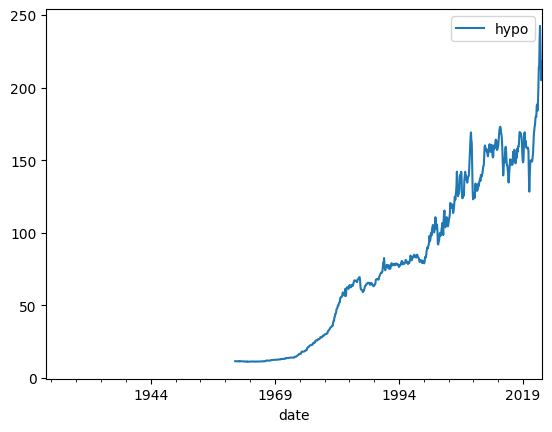

In [121]:
from stats_can import sc

df: pd.DataFrame = sc.vectors_to_df('v41691239', periods=12*100)
df.columns = ['hypo']
df.index.names = ['date']

df[::-1].plot()